# MODULO 04 - Análise e Previsão de Séries Temporais

## IMPORTAÇÃO LIBS

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from datetime import datetime 

import warnings
warnings.filterwarnings("ignore")

## IMPORTAÇÃO DO DATASET

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv",
                   sep = ";", skiprows=3, skipfooter=16, engine="python", encoding='ISO-8859-1')

dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151,85031
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094,84600
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574,86768
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723,86318
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176,85381


In [3]:
# removendo 'coluna Total'
dados.drop('Total', axis=1, inplace=True)
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [4]:
# removendo index 19
dados.drop(19, inplace=True)
dados 

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [5]:
# Função 'melt'
dados_set = dados.melt(id_vars='Ano Diagnóstico', value_name='Casos', var_name='Mês')
dados_set

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [6]:
# criando coluna com 'mes+ano'
dados_set['data'] = dados_set['Ano Diagnóstico'] + "-" + dados_set['Mês']
dados_set

,Ano Diagnóstico,Mês,Casos,data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


In [7]:
# Criando um dataframe "traduzindo" os meses

meses_port_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}

# função map para traduzir
dados_set['Mês'] = dados_set['Mês'].map(meses_port_ing)

In [8]:
# criando coluna com 'mes+ano'
dados_set['data'] = dados_set['Ano Diagnóstico'] + "-" + dados_set['Mês']
dados_set

,Ano Diagnóstico,Mês,Casos,data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [9]:
dados_set.sample(10)

,Ano Diagnóstico,Mês,Casos,data
185,2015,Oct,7345,2015-Oct
208,2019,Nov,7615,2019-Nov
31,2013,Feb,6209,2013-Feb
106,2012,Jun,6787,2012-Jun
42,2005,Mar,8441,2005-Mar
223,2015,Dec,6844,2015-Dec
113,2019,Jun,7363,2019-Jun
129,2016,Jul,6991,2016-Jul
49,2012,Mar,7882,2012-Mar
9,2010,Jan,6912,2010-Jan


In [10]:
# alterando o tipo de dado
dados_set['Data'] = pd.to_datetime(dados_set['data'])
dados_set

,Ano Diagnóstico,Mês,Casos,data,Data
0,2001,Jan,8088,2001-Jan,2001-01-01
1,2002,Jan,8013,2002-Jan,2002-01-01
2,2003,Jan,8115,2003-Jan,2003-01-01
3,2004,Jan,7574,2004-Jan,2004-01-01
4,2005,Jan,7432,2005-Jan,2005-01-01
...,...,...,...,...,...
223,2015,Dec,6844,2015-Dec,2015-12-01
224,2016,Dec,6672,2016-Dec,2016-12-01
225,2017,Dec,7020,2017-Dec,2017-12-01
226,2018,Dec,6900,2018-Dec,2018-12-01


In [11]:
dados_set = dados_set[['Data', 'Casos']]
dados_set.sample(3)

,Data,Casos
150,2018-08-01,8934
3,2004-01-01,7574
65,2009-04-01,7514


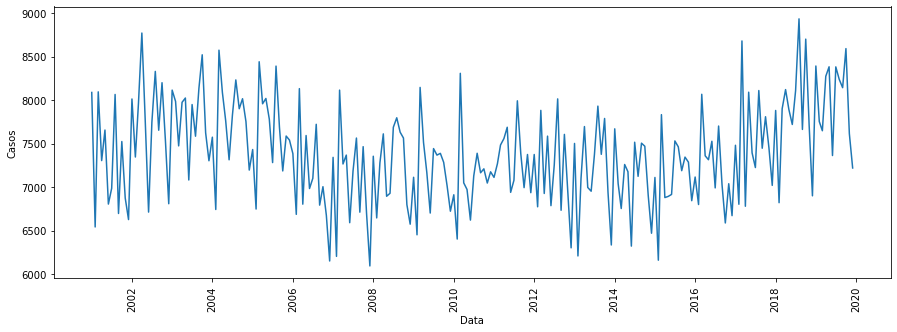

In [12]:
# Plotando
plt.figure(figsize=(15,5))

sns.lineplot(x="Data", y="Casos", data=dados_set)
plt.xticks(rotation = 90)
plt.show()

In [13]:
# ordenando o dataframe pela data
dados_set.sort_values(by='Data', inplace = True)
dados_set.reset_index(drop=True, inplace=True)

dados_set

,Data,Casos
0,2001-01-01,8088
1,2001-02-01,6542
2,2001-03-01,8095
3,2001-04-01,7305
4,2001-05-01,7656
...,...,...
223,2019-08-01,8239
224,2019-09-01,8143
225,2019-10-01,8592
226,2019-11-01,7615


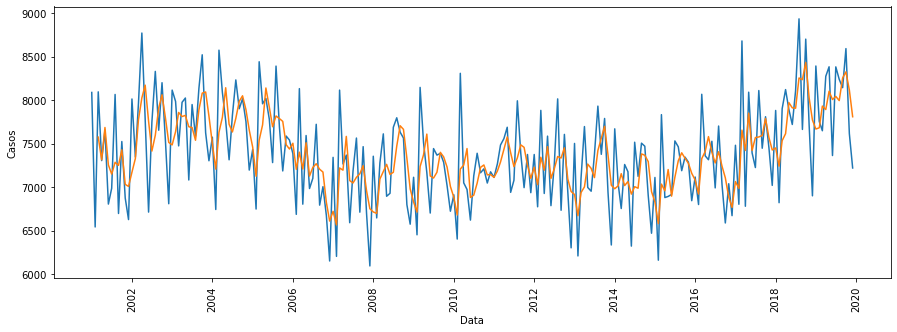

In [14]:
# Calculando a média móvel
dados_set['Media_movel_3'] = dados_set['Casos'].rolling(3).mean()

plt.figure(figsize=(15,5))

sns.lineplot(x="Data", y="Casos", data=dados_set)
sns.lineplot(x="Data", y="Media_movel_3", data=dados_set)

plt.xticks(rotation = 90)
plt.show()

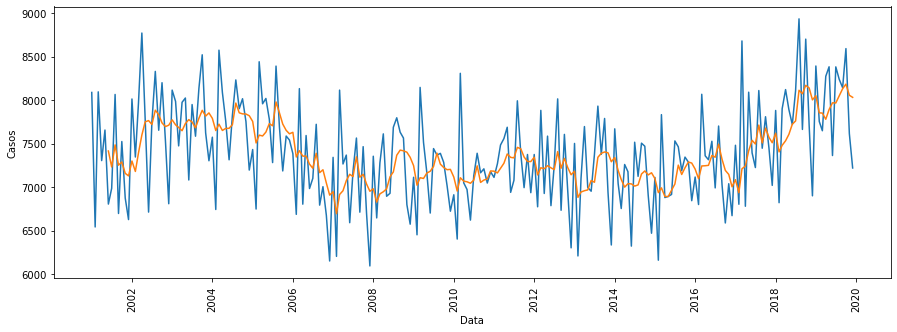

In [15]:
plt.figure(figsize=(15,5))

# Calculando a média móvel
dados_set['Media_movel_6'] = dados_set['Casos'].rolling(6).mean()

sns.lineplot(x="Data", y="Casos", data=dados_set)
sns.lineplot(x="Data", y="Media_movel_6", data=dados_set)

plt.xticks(rotation = 90)
plt.show()

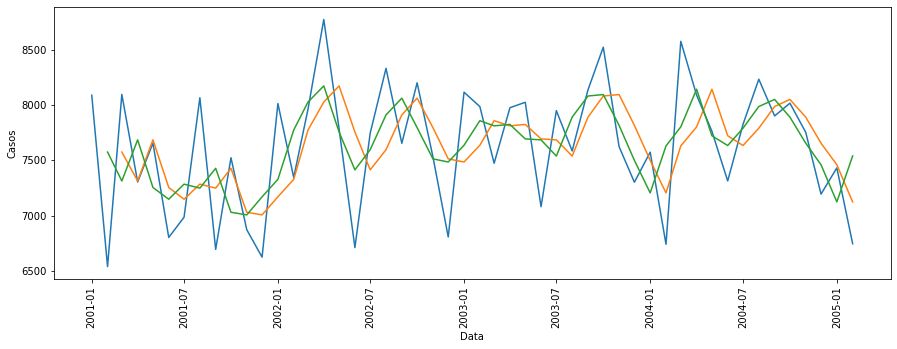

In [16]:
plt.figure(figsize=(15,5))

# Calculando a média móvel
dados_set['Media_movel_6'] = dados_set['Casos'].rolling(3).mean()

dados_set['Media_movel_3c'] = dados_set['Casos'].rolling(3, center = True).mean()

sns.lineplot(x="Data", y="Casos", data=dados_set[:50])
sns.lineplot(x="Data", y="Media_movel_3", data=dados_set[:50])
sns.lineplot(x='Data', y='Media_movel_3c', data = dados_set[:50])

plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Data', ylabel='Casos'>

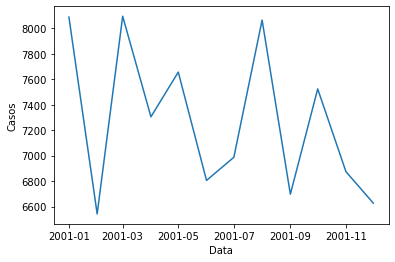

In [17]:
sns.lineplot(x='Data', y='Casos', data=dados_set[:12])

<AxesSubplot:xlabel='Data', ylabel='Casos'>

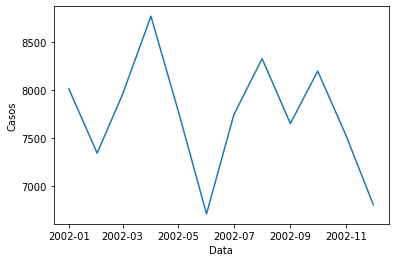

In [18]:
sns.lineplot(x='Data', y='Casos', data=dados_set[12:24])

In [19]:
dados_set['Ano'] = dados_set['Data'].dt.year
dados_set['Mes'] = dados_set['Data'].dt.month

<AxesSubplot:xlabel='Mes', ylabel='Casos'>

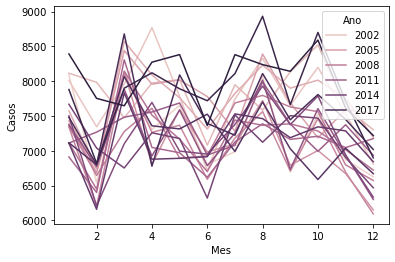

In [20]:
sns.lineplot(data=dados_set, x='Mes', y='Casos', hue='Ano')

<AxesSubplot:xlabel='Mes', ylabel='Casos'>

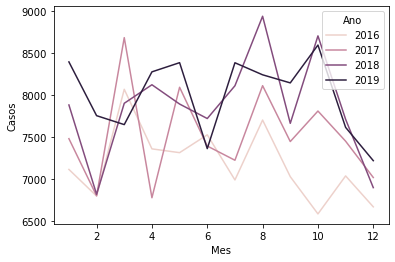

In [21]:
sns.lineplot(data=dados_set.query('Ano in [2019, 2018, 2017, 2016]'), x='Mes', y='Casos', hue='Ano')

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
# As datas precisam ser indices
decomposicao = seasonal_decompose(dados_set[['Data', 'Casos']].set_index('Data'))

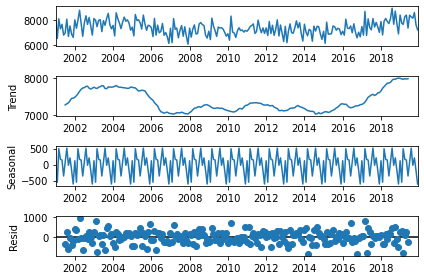

In [24]:
decomposicao.plot();

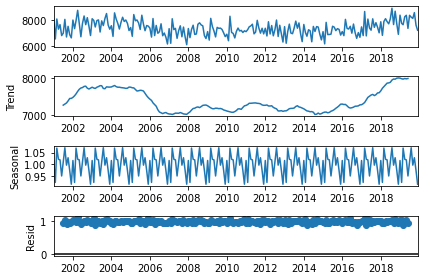

In [25]:
# As datas precisam ser indices
# Aditivos x multiplicativos
decomposicao = seasonal_decompose(dados_set[['Data', 'Casos']].set_index('Data'), model='multiplicative')
decomposicao.plot();

In [26]:
url_passageiros = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv"
dados_passageiros = pd.read_csv(url_passageiros)

In [27]:
dados_passageiros.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [28]:
dados_passageiros['Month'] = pd.to_datetime(dados_passageiros['Month'])

<AxesSubplot:xlabel='Month', ylabel='#Passengers'>

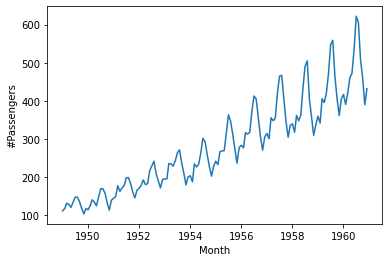

In [29]:
sns.lineplot(x='Month', y='#Passengers', data=dados_passageiros)

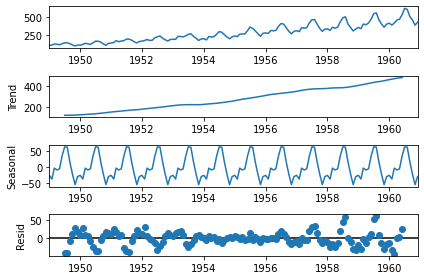

In [30]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index('Month'))
decomposicao_p.plot();

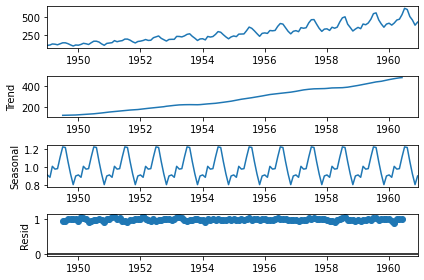

In [31]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index('Month'), model='multiplicative')
decomposicao_p.plot();

### AUTOCORRELACAO

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

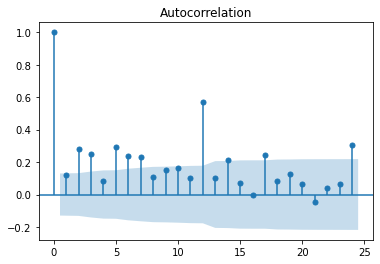

In [33]:
plot_acf(dados_set['Casos']);

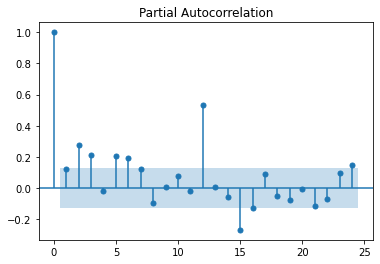

In [34]:
#autocorrelacao parcial

plot_pacf(dados_set['Casos']);

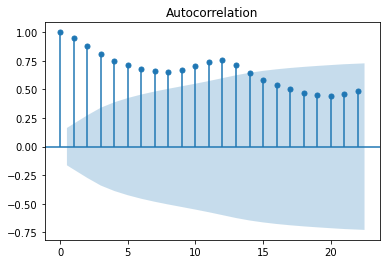

In [35]:
#autocorrelacao do dataset de passageiros
plot_acf(dados_passageiros['#Passengers']);

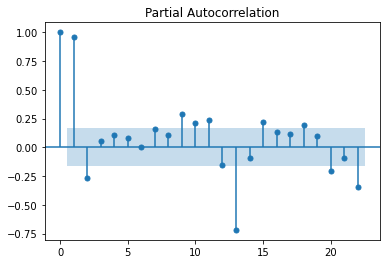

In [36]:
#autocorrelacao do dataset de passageiros parcial
plot_pacf(dados_passageiros['#Passengers']);

In [37]:
dados_passageiros.rename({'Month' : 'Data', '#Passengers': 'Passageiros'}, axis=1, inplace=True)
dados_passageiros

,Data,Passageiros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [38]:
dados_passageiros['Mes'] = dados_passageiros['Data'].dt.month
dados_passageiros['Ano'] = dados_passageiros['Data'].dt.year

In [39]:
dados_passageiros

,Data,Passageiros,Mes,Ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949
...,...,...,...,...
139,1960-08-01,606,8,1960
140,1960-09-01,508,9,1960
141,1960-10-01,461,10,1960
142,1960-11-01,390,11,1960


<AxesSubplot:xlabel='Mes', ylabel='Passageiros'>

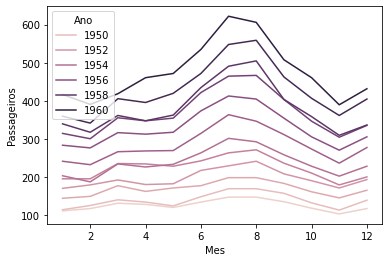

In [40]:
sns.lineplot(x='Mes', y='Passageiros', data = dados_passageiros, hue='Ano')

In [41]:
decomposicao_p.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

<AxesSubplot:xlabel='Month'>

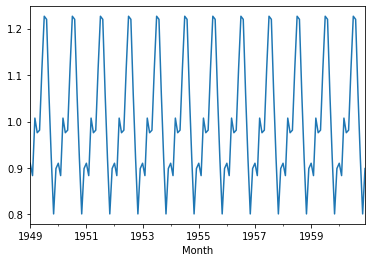

In [42]:
decomposicao_p.seasonal.plot()

<AxesSubplot:xlabel='Month'>

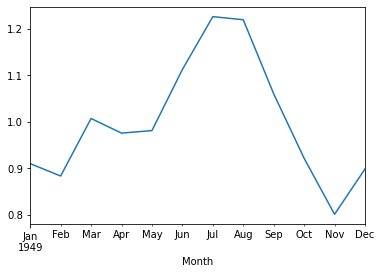

In [43]:
decomposicao_p.seasonal[:12].plot()

<AxesSubplot:xlabel='Data'>

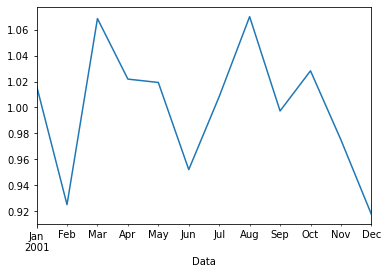

In [44]:
decomposicao.seasonal[:12].plot()

## ARIMA

In [45]:
from statsmodels.tsa.arima_model import ARIMA 

In [46]:
modelo_arima = ARIMA(dados_set['Casos'].values.astype('float32'), order=[0,0,0])
modelo_arima_treinado = modelo_arima.fit()

In [47]:
# média da série histórica
modelo_arima_treinado.forecast(12)[0]

array([7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
       7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
       7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772])

In [48]:
# Separando os dados de treino e dados de teste
dados_treino = dados_set.query('Ano != 2019')
dados_teste = dados_set.query('Ano == 2019')

modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float32'), order=[0,0,0])
modelo_arima_treinado = modelo_arima.fit()

previsao = modelo_arima_treinado.forecast(12)[0]

<AxesSubplot:xlabel='Data', ylabel='Casos'>

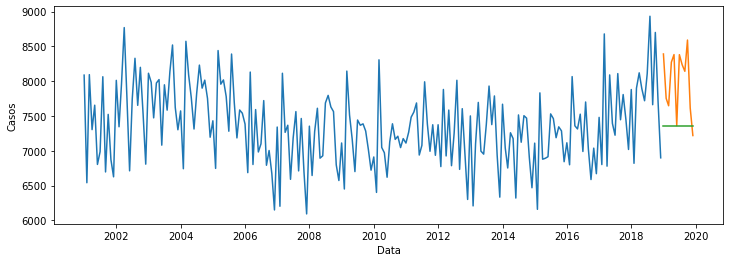

In [49]:
# Comparando
plt.figure(figsize=(12, 4))

dados_teste['previsao'] = previsao
sns.lineplot(x='Data', y='Casos', data = dados_treino)
sns.lineplot(x='Data', y='Casos', data = dados_teste) 
sns.lineplot(x='Data', y='previsao', data=dados_teste)

### AJUSTANDO OS PARÂMETROS

In [50]:
# Separando os dados de treino e dados de teste
dados_treino = dados_set.query('Ano != 2019')
dados_teste = dados_set.query('Ano == 2019')

modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float32'), order=[0,1,1])
modelo_arima_treinado = modelo_arima.fit()

previsao = modelo_arima_treinado.forecast(12)[0]

<AxesSubplot:xlabel='Data', ylabel='Casos'>

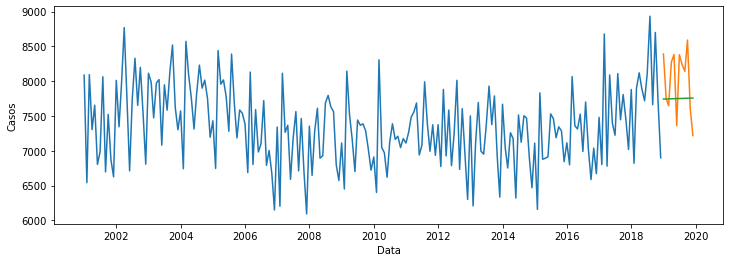

In [51]:
# Comparando
plt.figure(figsize=(12, 4))

dados_teste['previsao'] = previsao
sns.lineplot(x='Data', y='Casos', data = dados_treino)
sns.lineplot(x='Data', y='Casos', data = dados_teste) 
sns.lineplot(x='Data', y='previsao', data=dados_teste)

### MODELO ARIMA PARA A BASE DE PASSAGEIROS

<AxesSubplot:xlabel='Data', ylabel='Passageiros'>

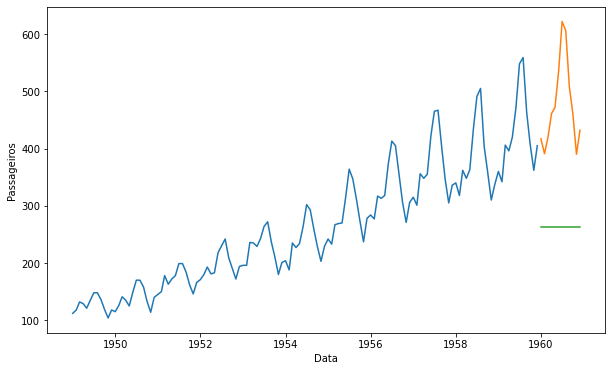

In [52]:
dados_treino_passageiros = dados_passageiros.query("Ano != 1960")
dados_teste_passageiros = dados_passageiros.query("Ano == 1960")

modelo_arima = ARIMA(dados_treino_passageiros["Passageiros"].values.astype("float32"), order=[0,0,0])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]
dados_teste_passageiros["previsao"] = previsao
plt.figure(figsize=(10,6))
sns.lineplot(x="Data", y="Passageiros", data=dados_treino_passageiros)
sns.lineplot(x="Data", y="Passageiros", data=dados_teste_passageiros)
sns.lineplot(x="Data", y="previsao", data=dados_teste_passageiros)

<AxesSubplot:xlabel='Data', ylabel='Passageiros'>

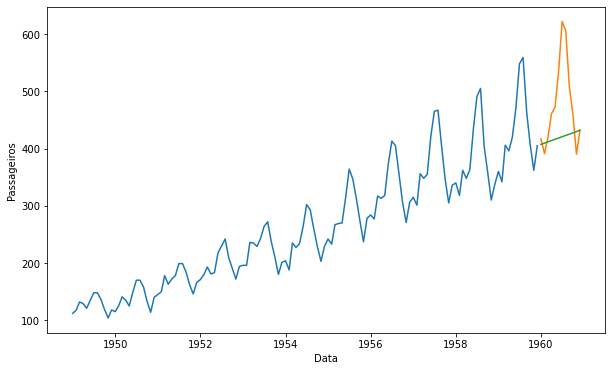

In [53]:
dados_treino_passageiros = dados_passageiros.query("Ano != 1960")
dados_teste_passageiros = dados_passageiros.query("Ano == 1960")

modelo_arima = ARIMA(dados_treino_passageiros["Passageiros"].values.astype("float32"), order=[0,1,0])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]
dados_teste_passageiros["previsao"] = previsao
plt.figure(figsize=(10,6))
sns.lineplot(x="Data", y="Passageiros", data=dados_treino_passageiros)
sns.lineplot(x="Data", y="Passageiros", data=dados_teste_passageiros)
sns.lineplot(x="Data", y="previsao", data=dados_teste_passageiros)

<AxesSubplot:xlabel='Data', ylabel='Passageiros'>

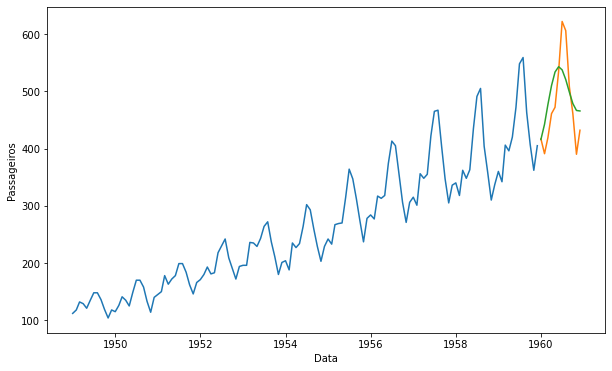

In [54]:
dados_treino_passageiros = dados_passageiros.query("Ano != 1960")
dados_teste_passageiros = dados_passageiros.query("Ano == 1960")

modelo_arima = ARIMA(dados_treino_passageiros["Passageiros"].values.astype("float32"), order=[2,1,2])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]
dados_teste_passageiros["previsao"] = previsao
plt.figure(figsize=(10,6))
sns.lineplot(x="Data", y="Passageiros", data=dados_treino_passageiros)
sns.lineplot(x="Data", y="Passageiros", data=dados_teste_passageiros)
sns.lineplot(x="Data", y="previsao", data=dados_teste_passageiros)

<AxesSubplot:xlabel='Data', ylabel='Casos'>

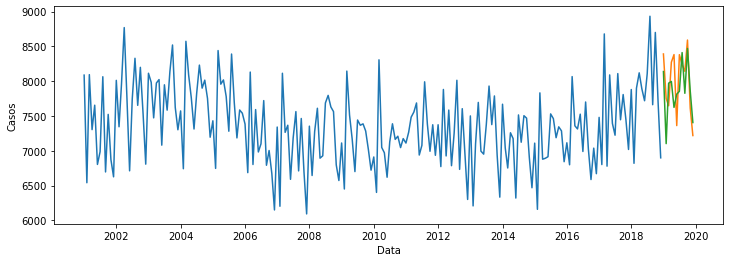

In [55]:
# Separando os dados de treino e dados de teste
dados_treino = dados_set.query('Ano != 2019')
dados_teste = dados_set.query('Ano == 2019')

modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float32'), order=[12,1,0])
modelo_arima_treinado = modelo_arima.fit()

previsao = modelo_arima_treinado.forecast(12)[0]

# Comparando
plt.figure(figsize=(12, 4))

dados_teste['previsao'] = previsao
sns.lineplot(x='Data', y='Casos', data = dados_treino)
sns.lineplot(x='Data', y='Casos', data = dados_teste) 
sns.lineplot(x='Data', y='previsao', data=dados_teste)

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<AxesSubplot:xlabel='Data', ylabel='Casos'>

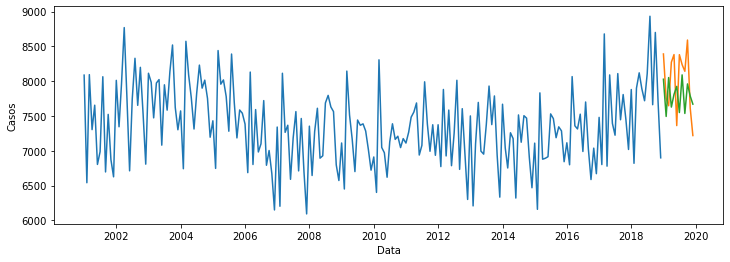

In [56]:
# Separando os dados de treino e dados de teste
dados_treino = dados_set.query('Ano != 2019')
dados_teste = dados_set.query('Ano == 2019')

modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float32'), order=[3,1,3])
modelo_arima_treinado = modelo_arima.fit()

previsao = modelo_arima_treinado.forecast(12)[0]

# Comparando
plt.figure(figsize=(12, 4))

dados_teste['previsao'] = previsao
sns.lineplot(x='Data', y='Casos', data = dados_treino)
sns.lineplot(x='Data', y='Casos', data = dados_teste) 
sns.lineplot(x='Data', y='previsao', data=dados_teste)

In [57]:
#pip install pmdarima

In [58]:
from pmdarima.arima import auto_arima

In [59]:
modelo_autoarima = auto_arima(dados_treino['Casos'].values, error_action='ignore', trace=True, seasonal=True, m=12 )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.14 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=1.37 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=2.70 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=0.80 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=1.68 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=0.71 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=3204.888, Time=2.56 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : 

In [60]:
modelo_autoarima

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True)

<AxesSubplot:xlabel='Data', ylabel='Casos'>

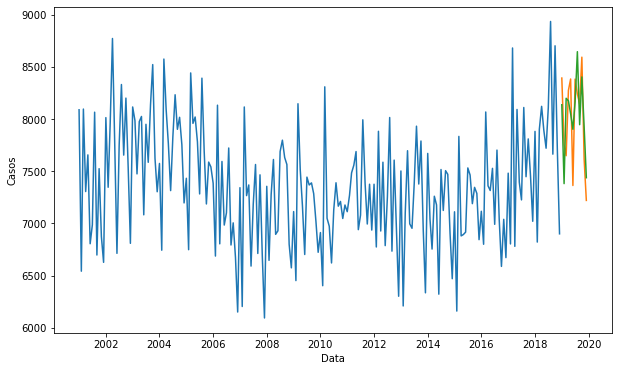

In [61]:
previsao_autoarima = modelo_autoarima.predict(12)
dados_teste['previsao_autoarima'] = previsao_autoarima

plt.figure(figsize=(10,6))
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_teste)
sns.lineplot(x='Data', y='previsao_autoarima', data=dados_teste)



<AxesSubplot:xlabel='Data', ylabel='Casos'>

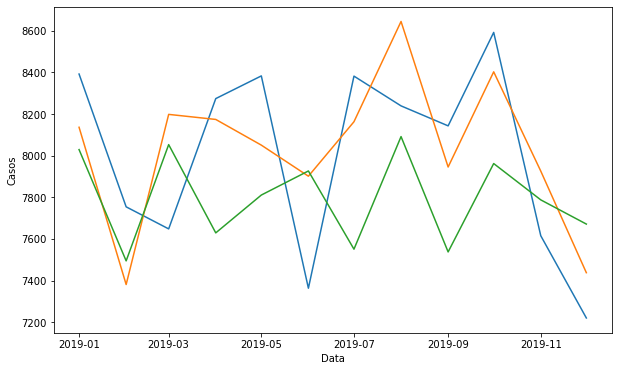

In [62]:
dados_teste["previsao_autoarima"] = previsao_autoarima
plt.figure(figsize=(10,6))
sns.lineplot(x="Data", y="Casos", data=dados_teste)
sns.lineplot(x="Data", y="previsao_autoarima", data=dados_teste)
sns.lineplot(x="Data", y="previsao", data=dados_teste)

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
resultado_autoarima = mean_squared_error(dados_teste['Casos'], dados_teste['previsao_autoarima'])
resultado_arima = mean_squared_error(dados_teste['Casos'], dados_teste['previsao'])

print(f'Autoarima = {resultado_autoarima}')
print(f'Arima = {resultado_arima}')

Autoarima = 112408.54677758936
Arima = 261206.85340913257


### PROPHET

In [65]:
#pip install prophet
#pip install fbprophet

In [66]:
#pip install fbprophet

In [67]:
from fbprophet import Prophet

In [74]:
modelo_profeta = Prophet(seasonality_mode='multiplicative')

mapa = {"Data": "ds", "Passageiros": "y"}
dados_treino_passageiros_profeta = dados_treino_passageiros[["Data", "Passageiros"]].rename(mapa,
                                                                                            axis=1)

modelo_profeta_treinado = modelo_profeta.fit(dados_treino_passageiros_profeta)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
futuro = modelo_profeta_treinado.make_future_dataframe(periods=12, freq='M')

In [76]:
futuro

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
139,1960-07-31
140,1960-08-31
141,1960-09-30
142,1960-10-31


In [77]:
resultado_profeta = modelo_profeta_treinado.predict(futuro)
resultado_profeta

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,114.639305,90.558330,115.425868,114.639305,114.639305,-0.100520,-0.100520,-0.100520,-0.100520,-0.100520,-0.100520,0.0,0.0,0.0,103.115737
1,1949-02-01,116.384234,86.344628,111.032366,116.384234,116.384234,-0.150637,-0.150637,-0.150637,-0.150637,-0.150637,-0.150637,0.0,0.0,0.0,98.852505
2,1949-03-01,117.960300,106.466281,131.355030,117.960300,117.960300,0.002393,0.002393,0.002393,0.002393,0.002393,0.002393,0.0,0.0,0.0,118.242634
3,1949-04-01,119.705230,103.051372,128.505773,119.705230,119.705230,-0.033548,-0.033548,-0.033548,-0.033548,-0.033548,-0.033548,0.0,0.0,0.0,115.689409
4,1949-05-01,121.393872,104.987593,130.512950,121.393872,121.393872,-0.026039,-0.026039,-0.026039,-0.026039,-0.026039,-0.026039,0.0,0.0,0.0,118.232889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-07-31,464.964868,570.222174,596.543280,464.328537,465.642436,0.254588,0.254588,0.254588,0.254588,0.254588,0.254588,0.0,0.0,0.0,583.339518
140,1960-08-31,467.775256,475.102166,500.482155,466.966253,468.652676,0.043498,0.043498,0.043498,0.043498,0.043498,0.043498,0.0,0.0,0.0,488.122531
141,1960-09-30,470.494987,415.358222,440.711135,469.551959,471.536899,-0.089816,-0.089816,-0.089816,-0.089816,-0.089816,-0.089816,0.0,0.0,0.0,428.237081
142,1960-10-31,473.305375,362.966650,386.721625,472.206190,474.513065,-0.208171,-0.208171,-0.208171,-0.208171,-0.208171,-0.208171,0.0,0.0,0.0,374.776771


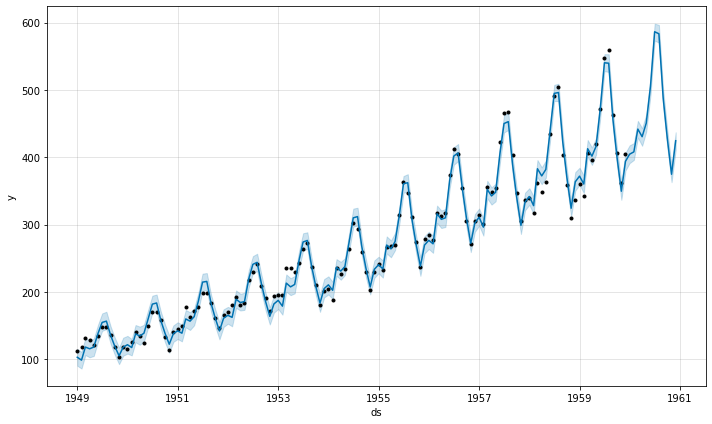

In [78]:
modelo_profeta_treinado.plot(resultado_profeta);